In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn.impute import SimpleImputer
import sklearn

In [10]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy  as np

In [155]:
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


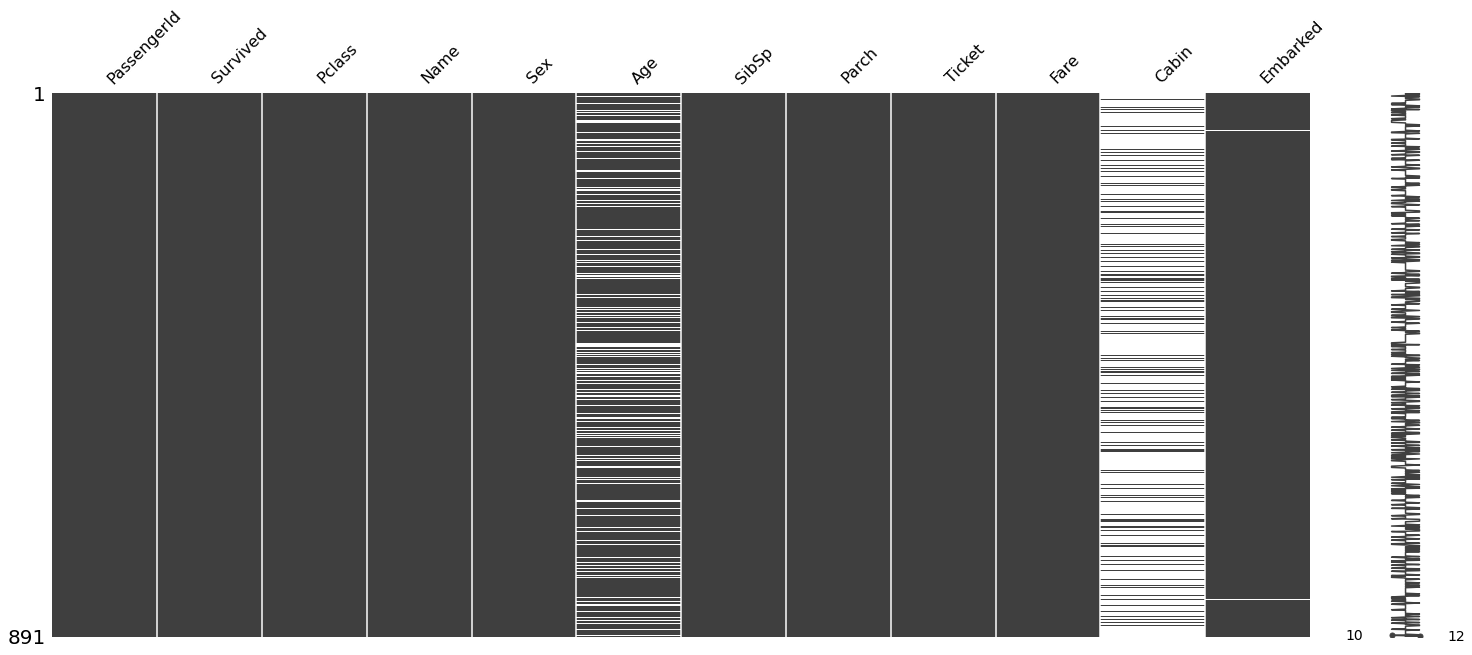

In [26]:
#3. missingno 패키지를 이용한 결측값을 가지는 컬럼 확인 및 처리
msno.matrix(titanic_df)
plt.show()

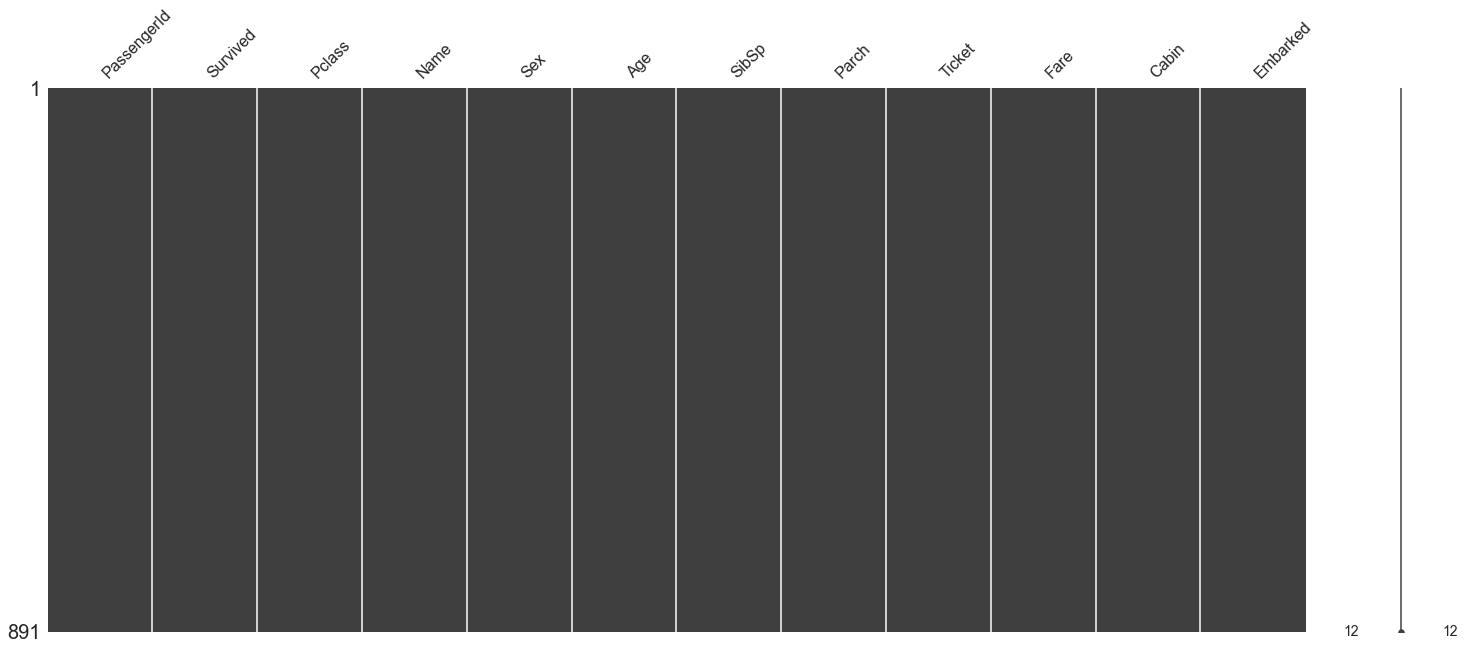

In [156]:
# -  age는 평균으로, cabin 'N', embarked 'N' 으로 대체
# mean, median, most_frequent

titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic_df['Age'] = titanic_age_imputer.fit_transform(titanic_df[['Age']])


titanic_df['Embarked']=titanic_df['Embarked'].fillna('N')
titanic_df['Cabin']=titanic_df['Cabin'].fillna('N')

msno.matrix(titanic_df)
plt.show()


<AxesSubplot:>

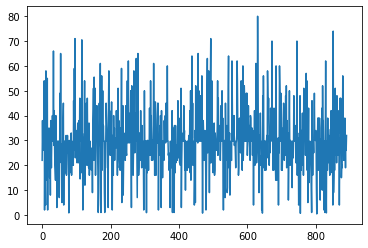

In [40]:
# 4. age , cabin , embarked 빈도확인
titanic_df['Age'].plot()

In [157]:
def get_category(age):
    category = ""
    if age <=5:
        category = 'baby'
    elif age <=12 :
        category = 'child'
    elif age <=19 :
        category = 'teenager'
    elif age <=24 :
        category = 'student'
    elif age <=39 :
        category = 'young adult'
    elif age <=60 :
        category = 'adult'
    else :
        category = 'elderly'
         
    return category 


In [158]:
titanic_df['age_category'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df['age_category'].value_counts()

young adult    451
adult          141
student        113
teenager        95
baby            44
child           25
elderly         22
Name: age_category, dtype: int64

<AxesSubplot:xlabel='age_category', ylabel='count'>

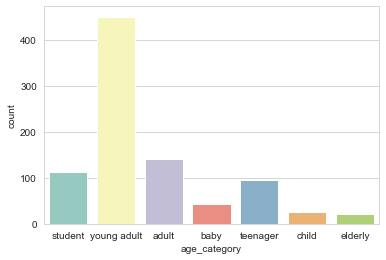

In [80]:
sns.set_style('whitegrid')

sns.countplot(x='age_category',data=titanic_df,palette='Set3')

<AxesSubplot:xlabel='age_category', ylabel='Survived'>

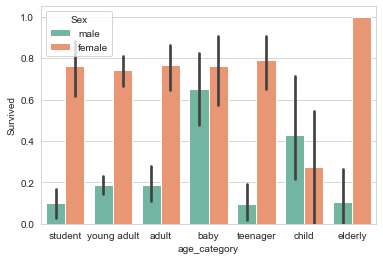

In [163]:
sns.barplot(x='age_category', y = 'Survived', hue='Sex', data=titanic_df,palette='Set2')

In [67]:
# 4. cabin 빈도확인
titanic_df['Cabin'].count()

891

In [64]:
# 4. embarked 빈도확인
freq_Embarked=titanic_df.groupby('Embarked').count()
freq_Embarked=pd.DataFrame(freq_Embarked['PassengerId'])
freq_Embarked.rename(columns = {'PassengerId' : 'freq'}, inplace = True)
freq_Embarked

,freq
Embarked,
C,168
N,2
Q,77
S,644


<AxesSubplot:xlabel='Embarked', ylabel='count'>

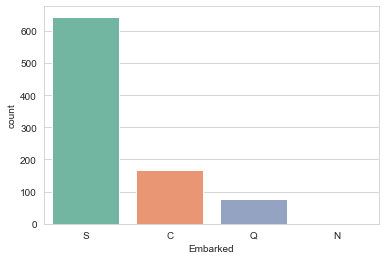

In [76]:
sns.set_style('whitegrid')

sns.countplot(x='Embarked',data=titanic_df,palette='Set2')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

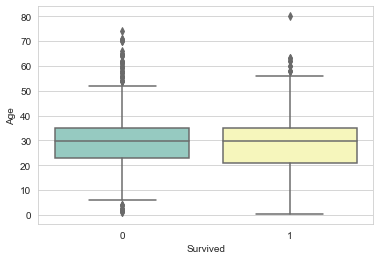

In [73]:
sns.set_style('whitegrid')

sns.boxplot(x='Survived', y='Age',data=titanic_df,palette='Set3')

In [107]:
# 6. sex , cabin , embarked 에 대한 라벨인코딩
from sklearn.preprocessing import LabelEncoder

sex_label = titanic_df['Sex']
encoder = LabelEncoder()
encoder.fit(sex_label)
sex_digit_label = encoder.transform(sex_label)


cabin_label = titanic_df['Cabin']
encoder = LabelEncoder()
encoder.fit(cabin_label)
cabin_digit_label = encoder.transform(cabin_label)


embarked_label = titanic_df['Embarked']
encoder = LabelEncoder()
encoder.fit(embarked_label)
embarked_digit_label = encoder.transform(embarked_label)


titanic_df['Sex'] = sex_digit_label
titanic_df['Cabin'] = cabin_digit_label
titanic_df['Embarked'] = embarked_digit_label

In [109]:
# [ML학습]
# 1. 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3


In [127]:
titanic = titanic_df.drop(['PassengerId','Name','Ticket'], axis='columns',inplace=False)

In [128]:
feature = titanic.drop('Survived', axis='columns',inplace=False)
label = titanic['Survived']

In [129]:
# 2. 80:20 으로 데이터 분리(train_test_split)
# 학습 데이터 , 테스트 데이터 분리
X_train , X_test , y_train, y_test = train_test_split(feature , label,
                                                      test_size=0.2, 
                                                      random_state=100)

In [130]:
# 3. 의사결정트리를 이용한 학습, 예측 및 정확도 확인
# 학습을 위한 학습기 - 알고리즘으로 이루어져 있는 객체
titanic_dtc = DecisionTreeClassifier()
titanic_dtc.fit(X_train, y_train)
prediction = titanic_dtc.predict(X_test)
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print( '예측 정확도 : {0:.2f}'.format(accuracy_score(y_test, prediction)))

예측 정확도 : 0.78


In [148]:
# # 4. KFold=5 를 이용한 교차검증 및 평균정확도 확인
# # k=5
# from sklearn.model_selection import StratifiedKFold

# result_skfold = StratifiedKFold(n_splits=5)
# result_clf = DecisionTreeClassifier(random_state=100)
# idx_iter=0
# cv_accuracy=[]

# # StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
# for train_index, test_index in result_skfold.split(feature,label):
#     # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
#     X_train, X_test = feature[train_index],feature[test_index]
#     y_train, y_test = label[train_index], label[test_index]
    
#     #학습 및 예측 
#     result_clf.fit(X_train , y_train)    
#     pred = result_clf.predict(X_test)

#     # 반복 시 마다 정확도 측정 
#     idx_iter += 1
#     accuracy = np.round(accuracy_score(y_test,pred), 4)
#     train_size = X_train.shape[0]
#     test_size = X_test.shape[0]
    
#     print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
#           .format(idx_iter, accuracy, train_size, test_size))
#     print('#{0} 검증 세트 인덱스:{1}'.format(idx_iter,test_index))
#     cv_accuracy.append(accuracy)

In [132]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
import pandas as pd
import numpy  as np

In [133]:
#5. cross_val_score 를 이용한 교차검증 및 평균정확도 확인
cvs_feature = feature
cvs_label = label
cvs_dtc = DecisionTreeClassifier(random_state=100)

scoring1 = cross_val_score(cvs_dtc,cvs_feature,cvs_label,scoring='accuracy',cv=3)
scoring2 = cross_validate(cvs_dtc,cvs_feature,cvs_label,scoring='accuracy',cv=3)


print('교차 검증별 정확도 : ', scoring2['test_score'])
print(scoring2) # 실행 시간도 확인 할 수 있다
print('교차 검증 시간 : ', scoring2['fit_time'])

print('*'*50)

print('교차 검증별 정확도 : ', scoring1)
print('평균 검증 정확도 : ', np.mean(scoring1))

교차 검증별 정확도 :  [0.75084175 0.78451178 0.78114478]
{'fit_time': array([0.0159204 , 0.01038408, 0.00997424]), 'score_time': array([0.00408721, 0.0064888 , 0.00552273]), 'test_score': array([0.75084175, 0.78451178, 0.78114478])}
교차 검증 시간 :  [0.0159204  0.01038408 0.00997424]
**************************************************
교차 검증별 정확도 :  [0.75084175 0.78451178 0.78114478]
평균 검증 정확도 :  0.7721661054994389


In [134]:
# 6. GridSearchCV 를 이용한 교차검증 및 평균정확도 확인
# 하이퍼 파라미터 적용해보기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy  as np

In [146]:
# GridSearchCV 하이퍼 파라미터 튜닝
titanic_feature = feature
titanic_label = label

# 학습 데이터 , 테스트 데이터 분리
X_train , X_test , y_train, y_test = train_test_split(titanic_feature , titanic_label ,
                                                      test_size=0.2, 
                                                      random_state=100)

ancer_dtc = DecisionTreeClassifier()

params = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

titanic_grid_tree = GridSearchCV(ancer_dtc, 
                              param_grid = params, cv=5, refit=True,scoring='accuracy')

titanic_grid_tree.fit(X_train,y_train)

titanic_grid_df = pd.DataFrame(titanic_grid_tree.cv_results_)
titanic_grid_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
1,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
4,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
6,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
7,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
8,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.780902,26,0.762238,0.797203,0.816901
9,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.810421,7,0.776224,0.825175,0.823944


In [147]:
print('최적의 파라미터 : ', titanic_grid_tree.best_params_)
print('높은 정확도 : ', titanic_grid_tree.best_score_)

최적의 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
높은 정확도 :  0.8202698709740964
